In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Read the data set and understand the data

In [2]:
#Add the headers as there is no header defined in the data set
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names=['IR','MR','FF','CR','CO','OP','Class'])

In [3]:
df.shape

(250, 7)

In [4]:
df.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CR       250 non-null object
CO       250 non-null object
OP       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
df.isnull().sum()

IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
Class    0
dtype: int64

NB    143
B     107
Name: Class, dtype: int64


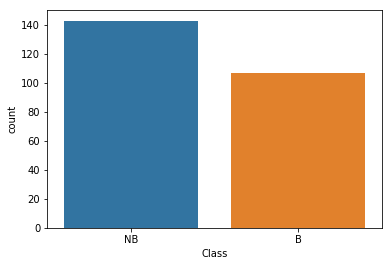

In [7]:
sns.countplot(x='Class', data=df)
print(df['Class'].value_counts())

# 2. Separate Labels from the Target variable

In [8]:
df_X = df.drop(labels='Class',axis=1)
df_Y = df['Class']

In [9]:
df_X.head()

,IR,MR,FF,CR,CO,OP
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [10]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
IR    250 non-null object
MR    250 non-null object
FF    250 non-null object
CR    250 non-null object
CO    250 non-null object
OP    250 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


In [11]:
df_Y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

# 3. Encode the categorical features

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_X_dummies = df_X.apply(le.fit_transform)
df_X_dummies = pd.get_dummies(data=df_X)

In [74]:
df_X_dummies.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [75]:
df_X_dummies.shape

(250, 18)

# 4. Split Data as Train and Test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_X_dummies, df_Y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(200, 18) (50, 18)
(200,) (50,)


In [25]:
y_test

142    NB
6      NB
97     NB
60     NB
112    NB
181     B
197     B
184     B
9      NB
104    NB
200     B
216     B
236     B
240     B
67     NB
224     B
194     B
15     NB
177     B
24     NB
247     B
19     NB
114    NB
68     NB
176     B
45     NB
55     NB
10     NB
30     NB
120    NB
201     B
33     NB
141    NB
219     B
25     NB
111    NB
18     NB
196     B
180     B
159     B
118    NB
96     NB
108    NB
185     B
222     B
16     NB
146     B
69     NB
173     B
38     NB
Name: Class, dtype: object

# 5. PCA on Train Data

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
X_pca = pca.transform(X_train)
X_pca.shape

(200, 19)

In [81]:
pca.explained_variance_

array([1.26129256e+00, 4.91338723e-01, 3.65098583e-01, 3.59927992e-01,
       3.26759812e-01, 3.00972884e-01, 2.69370942e-01, 2.28289828e-01,
       2.04337375e-01, 1.76102441e-01, 1.02078664e-01, 5.54069457e-02,
       1.13850558e-02, 2.39973860e-32, 1.49470280e-32, 1.30846547e-32,
       4.76289520e-33, 2.73435563e-33, 5.50034428e-34])

In [82]:
pca.explained_variance_ratio_

array([3.03753049e-01, 1.18327532e-01, 8.79255228e-02, 8.66803060e-02,
       7.86925195e-02, 7.24823361e-02, 6.48717415e-02, 5.49783084e-02,
       4.92099159e-02, 4.24101871e-02, 2.45832778e-02, 1.33434773e-02,
       2.74182653e-03, 5.77921365e-33, 3.59964490e-33, 3.15113550e-33,
       1.14703280e-33, 6.58506111e-34, 1.32463030e-34])

In [83]:
pca.components_.shape

(19, 19)

In [85]:
cov_matrix = np.cov(X_train.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [86]:
print(eigen_values)

[ 1.26129256e+00  4.91338723e-01  3.65098583e-01  3.59927992e-01
  3.26759812e-01  3.00972884e-01  2.69370942e-01  2.28289828e-01
  2.04337375e-01  1.76102441e-01  1.02078664e-01  5.54069457e-02
  1.13850558e-02  6.86424711e-16  5.62559643e-16  2.43948734e-16
 -3.28308202e-16 -2.13499792e-16 -1.95597559e-18]


In [87]:
total = sum(eigen_values)
var_explained = [(i/total) * 100 for i in sorted(eigen_values, reverse=True)]
cum_var_explained = np.cumsum(var_explained)
print("Variable Explained : ", var_explained)
print("Cumulative Sum : ", cum_var_explained)

Variable Explained :  [30.375304943119254, 11.832753164334846, 8.792552276588244, 8.66803059936735, 7.869251945841832, 7.248233609625205, 6.4871741543270325, 5.49783083529895, 4.920991589451909, 4.241018713200254, 2.4583277816601656, 1.3343477339820937, 0.27418265320280566, 1.653094655072813e-14, 1.354794376649878e-14, 5.8749392656348485e-15, -4.7105133946481466e-17, -5.1416471291193945e-15, -7.90654131677654e-15]
Cumulative Sum :  [ 30.37530494  42.20805811  51.00061038  59.66864098  67.53789293
  74.78612654  81.27330069  86.77113153  91.69212312  95.93314183
  98.39146961  99.72581735 100.         100.         100.
 100.         100.         100.         100.        ]


In [88]:
cum_var_explained

array([ 30.37530494,  42.20805811,  51.00061038,  59.66864098,
        67.53789293,  74.78612654,  81.27330069,  86.77113153,
        91.69212312,  95.93314183,  98.39146961,  99.72581735,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

# 6. Elbow Plot

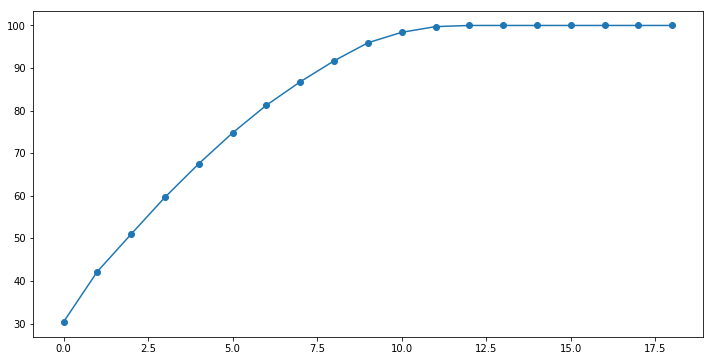

In [89]:
plt.figure(figsize=(12,6))
plt.plot([(i)for i in range(len(cum_var_explained))], cum_var_explained, marker = "o" )

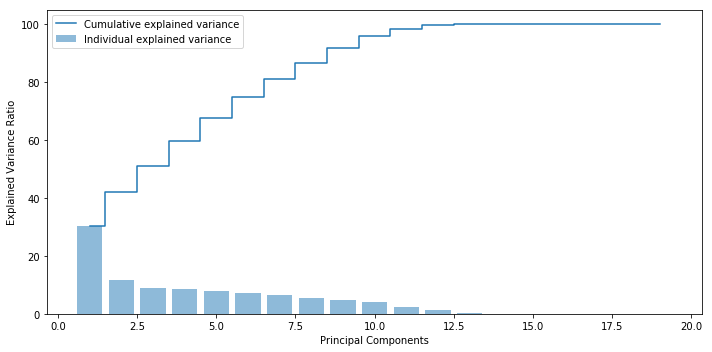

In [90]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cum_var_explained, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

*** From the above plots it is infered that 10 principal components are required to cover more than 95% variance ***

# 7. Use PCA and Transform the Data, using reduced components

*** From above analysis we need 10 prinicipal components to achieve > 95% variance ***

In [114]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

In [115]:
X_pca

array([[-1.17175747,  0.68824805, -0.8674547 , ..., -0.15605021,
        -0.06507179,  0.02082107],
       [ 1.48900981, -0.20397963,  0.48295063, ..., -0.33224423,
         0.22987487, -0.1442607 ],
       [ 0.59249108,  0.31841005,  0.34251967, ..., -0.6766234 ,
         0.59660225,  0.22494638],
       ...,
       [-0.42663636,  0.53198407, -1.253294  , ..., -0.59354602,
         0.76621176,  0.02663183],
       [ 0.80577136, -0.1775056 , -0.16144733, ...,  0.39063701,
        -0.1672668 , -0.22399837],
       [-1.11790785, -0.48159312,  0.22710495, ...,  0.03486876,
         0.58325545,  0.56337904]])

# 8. KMeans on PCA transformed data

In [93]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [94]:
kmeans = KMeans(n_clusters=2, random_state=12)
cluster_labels = kmeans.fit_predict(X_pca)

In [95]:
kmeans.cluster_centers_

array([[ 1.23848907e+00,  1.07376257e-01,  5.83931551e-02,
        -4.12231767e-03,  7.65108866e-03,  1.55060646e-03,
         2.52935062e-02,  1.33585939e-02,  1.72880074e-02,
         1.62477723e-02],
       [-9.34298772e-01, -8.10031414e-02, -4.40509767e-02,
         3.10981859e-03, -5.77187390e-03, -1.16975575e-03,
        -1.90810661e-02, -1.00775357e-02, -1.30418301e-02,
        -1.22570914e-02]])

In [96]:
cluster_labels

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int32)

# 9. Silhouette analysis to find the optimal cluster

For n_clusters = 2 The average silhouette_score is : 0.276420652908148 Cluster Inertia =  558.8168239944032


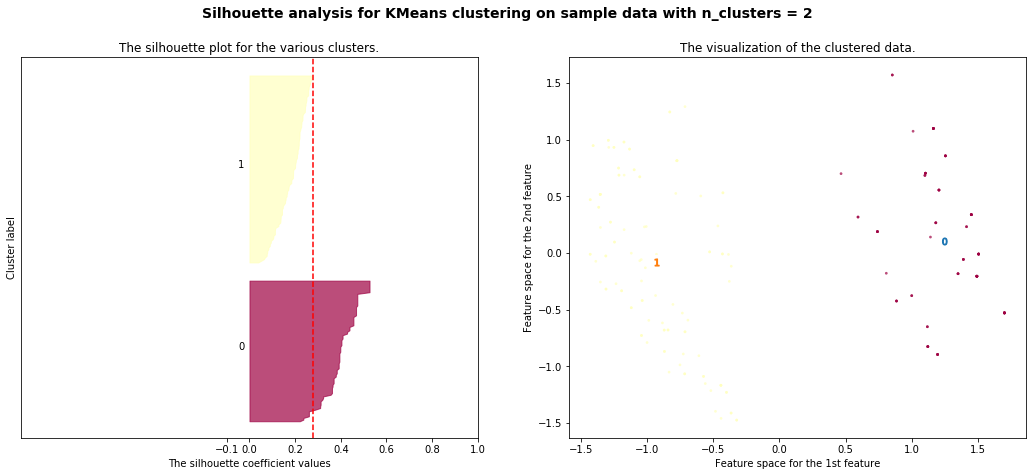

For n_clusters = 3 The average silhouette_score is : 0.24480896732235372 Cluster Inertia =  500.9984629449282


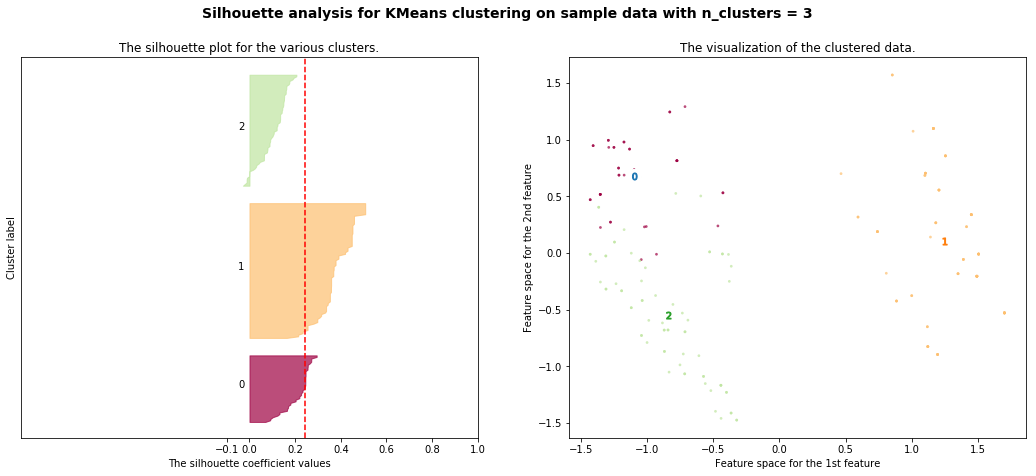

For n_clusters = 4 The average silhouette_score is : 0.2467478003169866 Cluster Inertia =  460.5515850667856


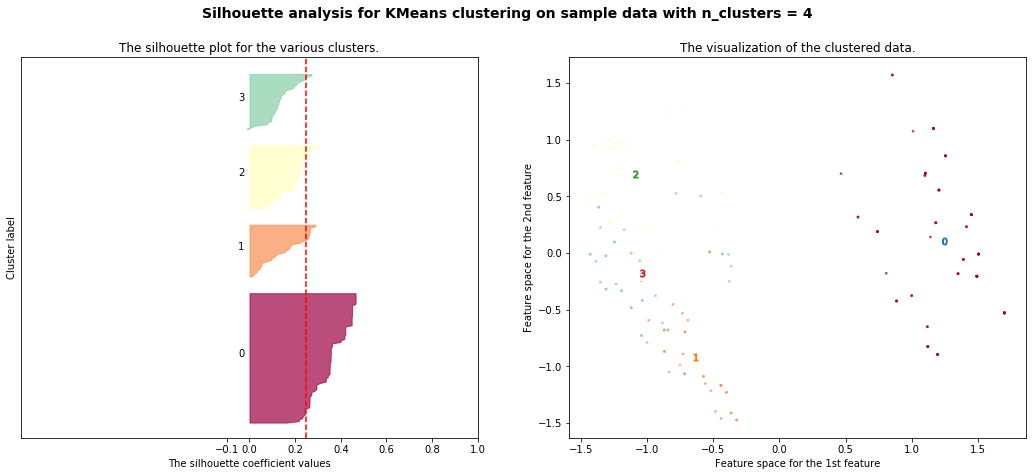

For n_clusters = 5 The average silhouette_score is : 0.18557819454752356 Cluster Inertia =  430.5134561493763


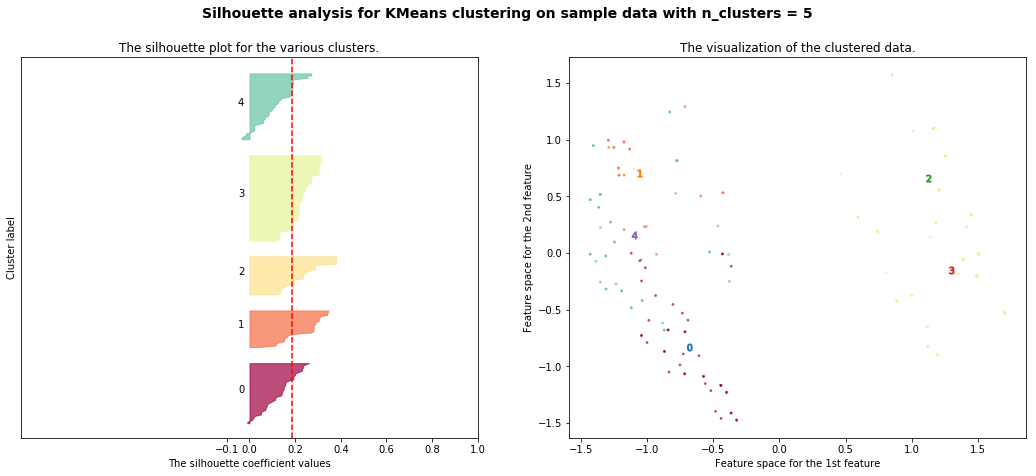

For n_clusters = 6 The average silhouette_score is : 0.18369235290965222 Cluster Inertia =  403.5845995691133


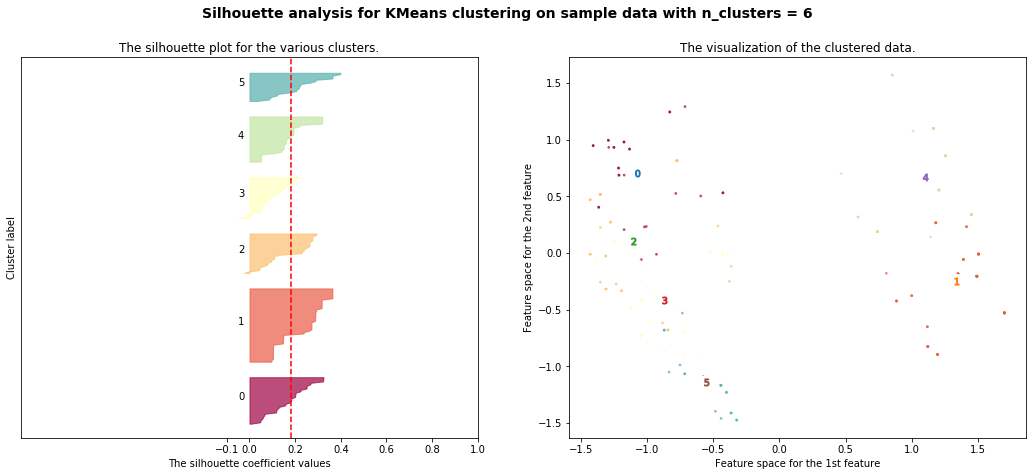

For n_clusters = 7 The average silhouette_score is : 0.19937428163016171 Cluster Inertia =  379.93441574584506


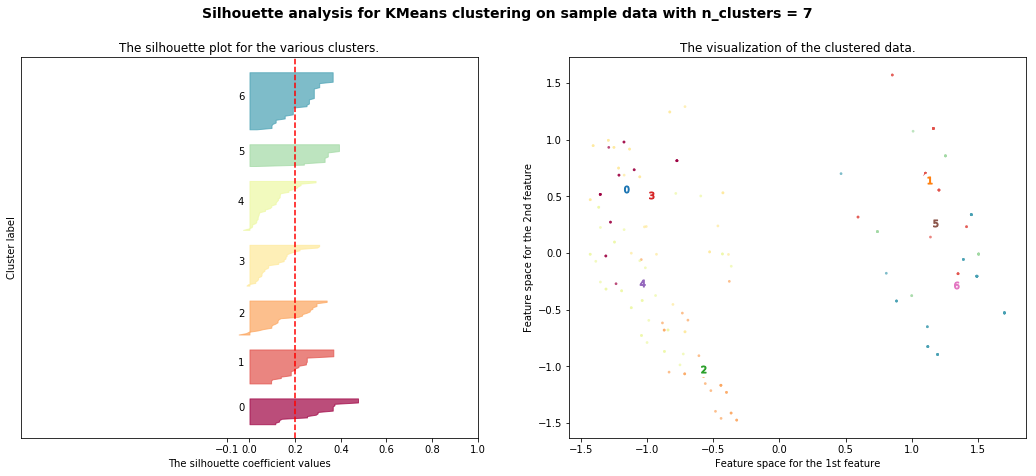

For n_clusters = 8 The average silhouette_score is : 0.2330573917652335 Cluster Inertia =  346.90116039820754


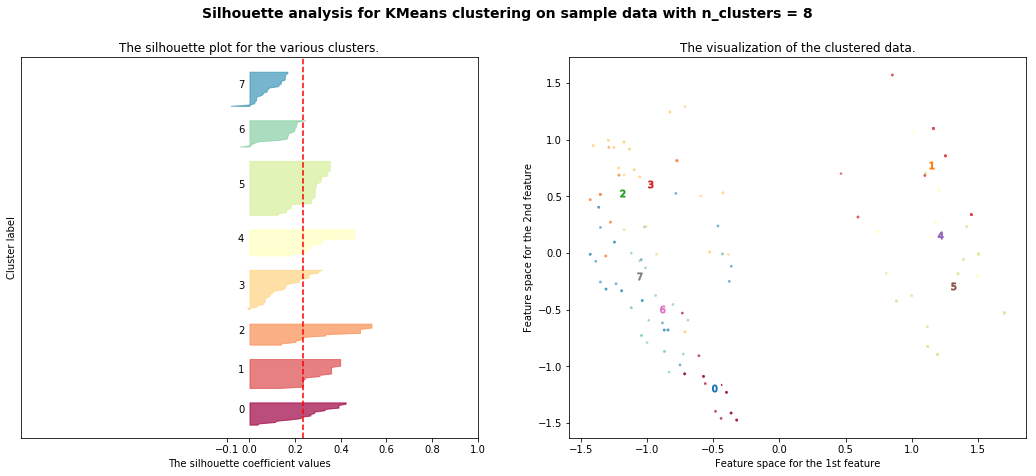

In [97]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Creating a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 12 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=12)
    cluster_labels = clusterer.fit_predict(X_pca)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg, "Cluster Inertia = ", clusterer.inertia_)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# 10.Find Cluster labels using optimal clusters

In [99]:
kmeans = KMeans(n_clusters=2, random_state=12)
cluster_labels = kmeans.fit_predict(X_pca)

In [100]:
kmeans.cluster_centers_

array([[ 1.23848907e+00,  1.07376257e-01,  5.83931551e-02,
        -4.12231767e-03,  7.65108866e-03,  1.55060646e-03,
         2.52935062e-02,  1.33585939e-02,  1.72880074e-02,
         1.62477723e-02],
       [-9.34298772e-01, -8.10031414e-02, -4.40509767e-02,
         3.10981859e-03, -5.77187390e-03, -1.16975575e-03,
        -1.90810661e-02, -1.00775357e-02, -1.30418301e-02,
        -1.22570914e-02]])

In [101]:
cluster_labels

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int32)

In [102]:
X_train['labels'] = cluster_labels

In [103]:
X_train.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,labels
132,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1
225,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
238,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
119,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1
136,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1


# 11.Transform Test data using same PCA

In [104]:
X_pca_test = pca.transform(X_test)
cluster_labels_test = kmeans.fit_predict(X_pca_test)
cluster_labels_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1], dtype=int32)

In [105]:
X_test['labels'] = cluster_labels_test

In [106]:
X_test.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,labels
142,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1
97,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
60,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
112,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1


# 12. SVC on Train and Test data set

In [107]:
X_train_svc = X_train.drop(labels=['labels'], axis=1)
y_train_svc = X_train.labels

In [108]:
X_test_svc = X_test.drop(labels=['labels'], axis=1)
y_test_svc = X_test.labels

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [110]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))

1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


In [111]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))

1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


In [112]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='poly')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))

0.92
0.88
Confusion Matrix:
 [[15  6]
 [ 0 29]]


In [113]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_svc, y_train_svc)

prediction = svc_model .predict(X_test_svc)
# check the accuracy on the training set
print(svc_model.score(X_train_svc, y_train_svc))
print(svc_model.score(X_test_svc, y_test_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test_svc,prediction))
accuracy_score(y_test_svc,prediction)

0.995
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


1.0